In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Feature matrix and target array

In [3]:
y_iris = iris['species']
x_iris = iris.drop('species', axis = 1)

In [20]:
x_iris.shape

(150, 4)

In [21]:
y_iris.shape

(150,)

# Supervised ML: Simple Linear Regresion

In [47]:
x = 5*np.random.rand(50)
y = x + np.random.rand(50)

<AxesSubplot:>

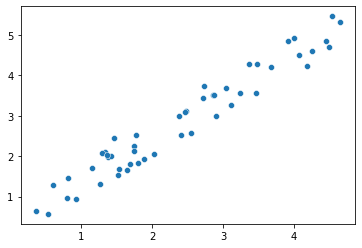

In [48]:
sns.scatterplot(x = x, y = y)

In [53]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression(fit_intercept = True)

In [71]:
model.fit(x[:,np.newaxis], y)

LinearRegression()

In [72]:
model.coef_

array([1.0535122])

In [73]:
model.intercept_

0.31718920744298007

In [74]:
x1 = np.linspace(0,5)[:,np.newaxis]
y1 = model.predict(x1)

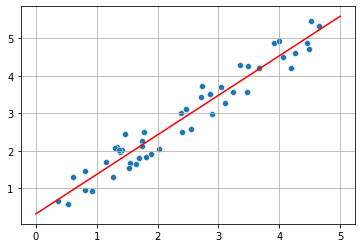

In [75]:
sns.scatterplot(x = x, y = y)
plt.plot(x1, y1, color = 'r')
plt.grid()

# Supervised learning: Iris

In [79]:
# We are going to train the model with part of the data and then we will check how well can we predict 
# the remaining part of the data?
# Training and testing sets:

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state = 1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [85]:
from sklearn.naive_bayes import GaussianNB # choose the model class
model = GaussianNB()                       # instantiate the model
model.fit(xtrain, ytrain)                  # train the model
ypredict = model.predict(xtest)            # predict the labels 

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypredict)

0.8

# Unsupervised learning: Iris dimensionality

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 We appreciate that the iris dataset is four dimensional as it is formed by 4 different features

In [7]:
# Principal component analysis
# we will ask the model to return a 2D version of the data, it is a fast linear dim reduction
from sklearn.decomposition import PCA
model = PCA(n_components = 2) # instantiate with the appropiate hyperparameters
model.fit(x_iris) # y_iris is not specified --> unsupervised learning!! just determine the 'extra' features
x_2D = model.transform(x_iris)
print('Initial feature matrix: ', x_iris.shape)
print('New feature dim: ',x_2D.shape)

Initial feature matrix:  (150, 4)
New feature dim:  (150, 2)


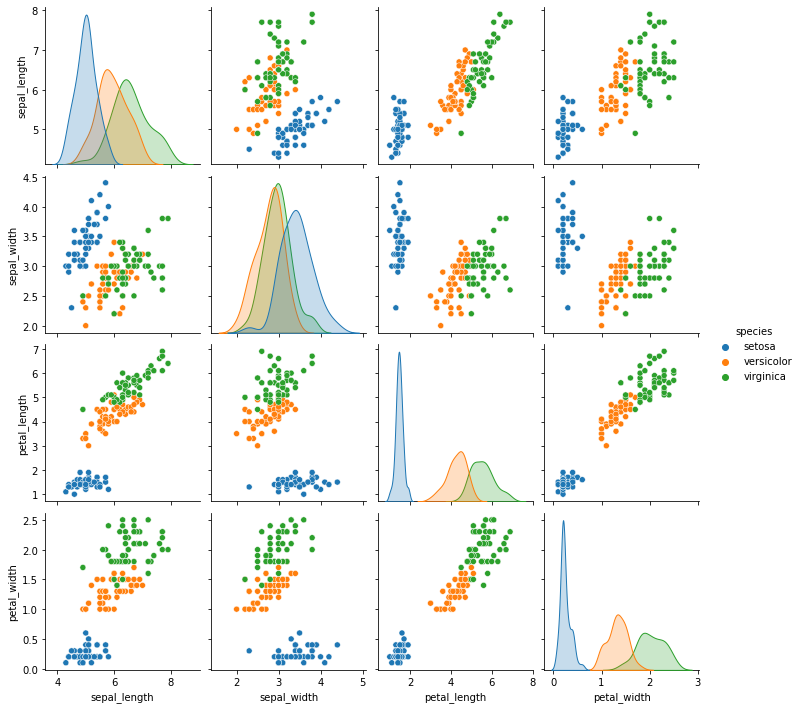

In [21]:
sns.pairplot(data = iris, hue = 'species')

<AxesSubplot:>

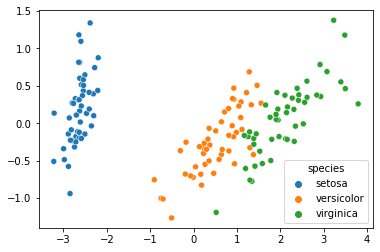

In [27]:
sns.scatterplot(data = iris, x = x_2D[:, 0], y = x_2D[:, 1], hue = 'species')

# Unsupervised learning Iris Clustering

In [34]:
# It will try to find cluster of point distributed as gaussian blubs
# from sklearn.mixture import GMM
from sklearn import mixture
model = mixture.GaussianMixture(n_components = 3, covariance_type = 'full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)

In [37]:
iris['gmm'] = y_gmm
iris['PCA1'] = x_2D[:, 0]
iris['PCA2'] = x_2D[:, 1]

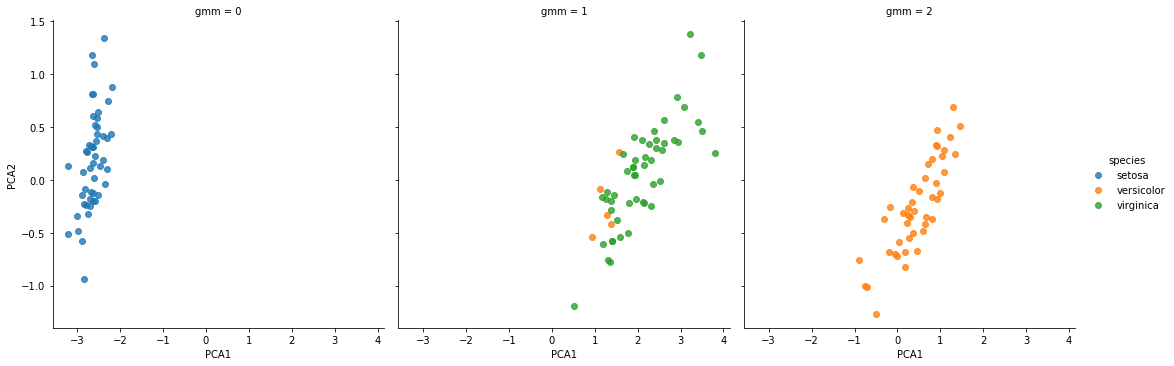

In [41]:
sns.lmplot(data = iris, x = 'PCA1', y = 'PCA2', hue = 'species', col = 'gmm', fit_reg = False)

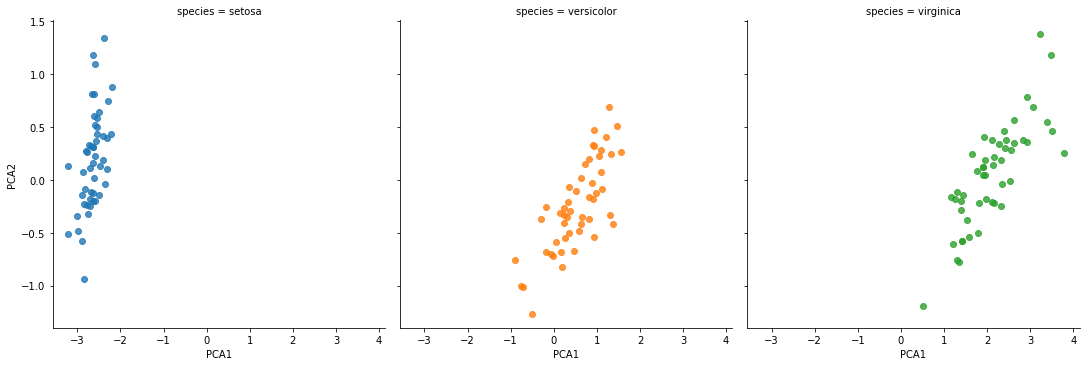

In [42]:
sns.lmplot(data = iris, x = 'PCA1', y = 'PCA2', hue = 'species', col = 'species', fit_reg = False)

Even if we don't have an expert to tell us and confirm that there are more that one species and withouth needing him to distinguish them the difference on the data recorded is enough to distingish that there are three groups with a fairl high accuracy

# Exploring handwritten images

In [44]:
from sklearn.datasets import load_digits

In [48]:
digits = load_digits()
digits.images.shape # 1797 images that consist of 8x8 pixels grid

(1797, 8, 8)

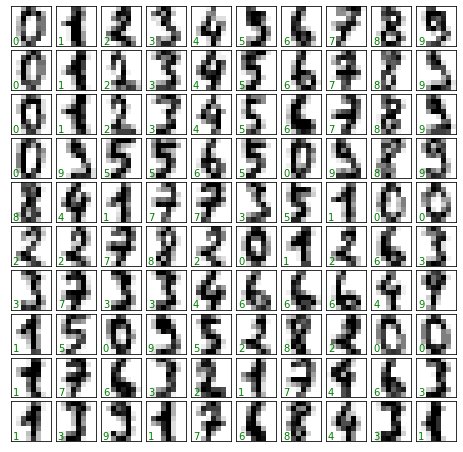

In [62]:
# creating a grid of isolated squares:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                        subplot_kw = {'xticks' : [], 'yticks' : []},
                        gridspec_kw = {'hspace' : 0.1, 'wspace' : 0.1})

# plotting an image on each square:
for i, ax in enumerate(axes.flat): # i: square number, ax: its axes associated
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), 
           transform = ax.transAxes, color = 'green')

In [96]:
# we need the [n_samples, n_features] representation
# we do this by treating each pixel as a different feature
x = digits.data
y = digits.target

### Dimensionality reduction

In [88]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

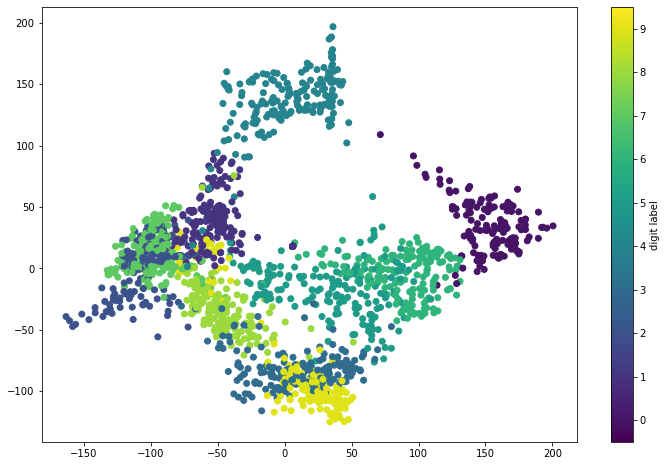

In [89]:
plt.figure(figsize = (12,8))

plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target, 
           cmap=plt.cm.get_cmap())
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

# Classification on digits

In [104]:
# Split into training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [105]:
model = mixture.GaussianMixture(n_components = 10)
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
accuracy_score(ytest, ymodel)

0.03333333333333333

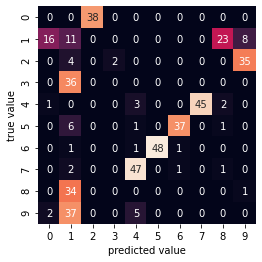

In [109]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ymodel)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Model validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state = 0, train_size = 0.5)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
model = KNeighborsClassifier(n_neighbors = 5)

In [69]:
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [63]:
ymodel = model.predict(xtest)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(ytest, ymodel)

0.96

# Tow-fold Cross Validation

In order to use all the available data both to train and test the model 

In [79]:
ymodel2 = model.fit(xtrain, ytrain).predict(xtest)
ymodel3 = model.fit(xtest, ytest).predict(xtrain)

performance = pd.Series([accuracy_score(ytest, ymodel2), accuracy_score(ytrain, ymodel3)])
performance

0    0.960000
1    0.973333
dtype: float64

In [75]:
performance.mean() # overall idea of the performance of the model

0.9666666666666667

# Multiple Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [92]:
cross_val_score(model, x_iris, y_iris, cv = 10).mean()

0.9666666666666668

In [90]:
# Extreme case --> number of folds is equal to the number of samples, we train on each point 
# but one each trial
# LEAVE-ONE-OUT VALIDATION
scores = cross_val_score(model, x_iris, y_iris, cv = LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [91]:
scores.mean()

0.9666666666666667

# Validation curves in Scikit-Learn 